In [1]:
import numpy as np
from gensim.models import KeyedVectors
from scipy.spatial.distance import cosine
import nltk
from nltk.corpus import words
nltk.download('words')
nltk.download('stopwords')
from nltk.corpus import stopwords
from embeddings import Embeddings
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import os
import pickle

[nltk_data] Downloading package words to
[nltk_data]     /Users/chitvangoyal/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chitvangoyal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
# Load pre-trained GloVe embeddings
def load_embeddings(file_path):
    return KeyedVectors.load_word2vec_format(file_path, binary=False)

# Compute cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

# Compute the differential association between two sets of words
def differential_association(word, A, B, embeddings):
    mean_cosine_A = np.mean([cosine_similarity(embeddings[word], embeddings[a]) for a in A])
    mean_cosine_B = np.mean([cosine_similarity(embeddings[word], embeddings[b]) for b in B])
    return mean_cosine_A - mean_cosine_B

# Compute effect size
def effect_size(X, A, B, embeddings):
    mean_X = np.mean([differential_association(x, A, B, embeddings) for x in X])
    std_dev = np.std([differential_association(x, A, B, embeddings) for x in X])
    return (mean_X) / std_dev

def display_gender_bias(X, Y, A, B, embeddings):
    male_vec = np.mean([embeddings[word] for word in A if word in embeddings], axis=0)
    female_vec = np.mean([embeddings[word] for word in B if word in embeddings], axis=0)
    
    for occupation in X + Y:
        if occupation in embeddings:
            occ_vec = embeddings[occupation]
            male_similarity = cosine_similarity(occ_vec, male_vec)
            female_similarity = cosine_similarity(occ_vec, female_vec)
            print(f"{occupation}: Male bias={male_similarity:.4f}, Female bias={female_similarity:.4f}")

def plot_gender_bias(X, Y, A, B, embeddings):
    male_biases = []
    female_biases = []
    labels = []

    # Compute the average vector for male and female attributes
    male_vec = np.mean([embeddings[word] for word in A if word in embeddings], axis=0)
    female_vec = np.mean([embeddings[word] for word in B if word in embeddings], axis=0)

    # Calculate biases for each occupation
    for occupation in X + Y:
        if occupation in embeddings:
            occ_vec = embeddings[occupation]
            male_bias = cosine_similarity(occ_vec, male_vec)
            female_bias = cosine_similarity(occ_vec, female_vec)
            male_biases.append(male_bias)
            female_biases.append(female_bias)
            labels.append(occupation)

    # Plotting
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(male_biases, female_biases, alpha=0.6)

    # Annotate some points
    for i, label in enumerate(labels):
        if i % 5 == 0:  # Annotate every 5th label for clarity
            plt.annotate(label, (male_biases[i], female_biases[i]))

    plt.axvline(x=0, color='grey', linestyle='--')
    plt.axhline(y=0, color='grey', linestyle='--')
    plt.title('Scatter Plot of Gender Bias by Occupation')
    plt.xlabel('Cosine Similarity to Male Vector')
    plt.ylabel('Cosine Similarity to Female Vector')
    plt.grid(True)
    plt.show()

In [3]:
def read_words_from_file(file_path):
    """
    Read words from a text file and return them as a list.
    
    Parameters:
        file_path (str): Path to the text file.
        
    Returns:
        list: List of words read from the file.
    """
    with open(file_path, 'r') as file:
        words = [line.strip() for line in file]
    return words

# Example usage
file_path = "../adjectives_appearance.txt" 
appearance = read_words_from_file(file_path)
print(appearance)

file_path = "../adjectives_intelligencegeneral.txt"  
intelligencegeneral = read_words_from_file(file_path)
print(intelligencegeneral)

file_path = "../female_pairs.txt"  
female = read_words_from_file(file_path)
print(female)

file_path = "../male_pairs.txt" 
male = read_words_from_file(file_path)
print(male)


['alluring', 'voluptuous', 'blushing', 'homely', 'plump', 'sensual', 'gorgeous', 'slim', 'bald', 'athletic', 'fashionable', 'stout', 'ugly', 'muscular', 'slender', 'feeble', 'handsome', 'healthy', 'attractive', 'fat', 'weak', 'thin', 'pretty', 'beautiful', 'strong']
['precocious', 'resourceful', 'inquisitive', 'sagacious', 'inventive', 'astute', 'adaptable', 'reflective', 'discerning', 'intuitive', 'inquiring', 'judicious', 'analytical', 'luminous', 'venerable', 'imaginative', 'shrewd', 'thoughtful', 'sage', 'smart', 'ingenious', 'clever', 'brilliant', 'logical', 'intelligent', 'apt', 'genius', 'wise']
['she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl', 'herself', 'female', 'sister', 'daughters', 'mothers', 'women', 'girls', 'females', 'sisters', 'aunt', 'aunts', 'niece', 'nieces']
['he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself', 'male', 'brother', 'sons', 'fathers', 'men', 'boys', 'males', 'brothers', 'uncle', 'uncles', 'nephew', 'nephews']


In [17]:
years = []
vocab = []
for file_name in os.listdir('../sgns/'):
        if file_name.endswith('.pkl'):
                if file_name[:4] not in  ['1880', '2000','1860','1900']:
                        file_path = os.path.join('../sgns/', file_name)
                        words = np.load(file_path, allow_pickle=True)
                        years.append(file_name[:4])
                        vocab.append(words)
                        #print(words)

In [18]:
def list_update(words_list):
    word_list_updated=[]
    for i in words_list:
        t=False
        for j in vocab:
            if i not in j:
                t = True
        if t == False:
            word_list_updated.append(i)
    return word_list_updated



In [20]:
years = sorted(years)
years

['1810',
 '1820',
 '1850',
 '1870',
 '1890',
 '1910',
 '1930',
 '1940',
 '1960',
 '1970',
 '1980']

In [21]:

file_path_words=[]
vec_path=[]
for year in years:
    for file_name in os.listdir('../sgns/'):
        if file_name.endswith('.pkl') and file_name.startswith(year):
            file_path = os.path.join('../sgns/', file_name)
            file_path_words.append(file_path)
        if file_name.endswith('.npy') and file_name.startswith(year):
            file_path = os.path.join('../sgns/', file_name)
            vec_path.append(file_path)

        
    

In [41]:
X = [
    'janitor', 'bailiff', 'geologist', 'athlete', 'physicist', 
    'blacksmith', 'psychologist', 'mathematician', 'surveyor', 'mechanic', 
    'laborer', 'postmaster', 'broker', 'chemist', 'scientist', 'carpenter', 
    'sailor', 'instructor', 'sheriff', 'pilot', 'inspector', 'mason', 
    'architect', 'collector', 'operator', 'surgeon', 'driver', 'engineer', 
    'lawyer', 'clergy', 'physician', 'farmer', 'manager', 'guard', 'smith', 
    'official', 'police', 'doctor', 'professor', 'judge', 'author', 'soldier','astronomer',
    'pharmacist', 'anatomist', 'linguist', 'comedian', 'swimmer',
    'entertainer', 'politician', 'astrologer', 'philosopher', 'technician', 'deputy', 'sculptor', 'businessman',
    'industrialist', 'historian' ,'critic', 'financier', 'president', 'actor', 'singer', 'filmmaker', 'botanist',
    "statistician", "statistician", 'chauffeur', 'divers'
]

# appearance
# intelligencegeneral

In [46]:
weat = []
effect_size_result =[]
# file_path_words=[]
# vec_path=[]
for i in range(len(years)):

    words = np.load(file_path_words[i], allow_pickle=True)
    vecs = np.load(vec_path[i], allow_pickle=True)

    keyed_vectors = KeyedVectors(vector_size=len(vecs[0]))
    keyed_vectors.add_vectors(words, vecs)
    #effect_size_result.append(effect_size(X=X, A=male, B=female, embeddings=keyed_vectors))
    #effect_size_result.append(effect_size(X=intelligencegeneral, A=male, B=female, embeddings=keyed_vectors))
    effect_size_result.append(effect_size(X=appearance, A=male, B=female, embeddings=keyed_vectors))

        
    

/Users/chitvangoyal/anaconda3/envs/2590-hw4/lib/python3.9/site-packages/scipy/spatial/distance.py:636: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [47]:
effect_size_result

[-0.2782070596259771,
 0.21860365119478672,
 0.7345575675925898,
 0.7428455849462483,
 0.5269835637021381,
 0.9352549097752489,
 0.9892394605299725,
 0.2743693198792299,
 0.4627182608574714,
 0.8698598368484262,
 0.745508504406957]

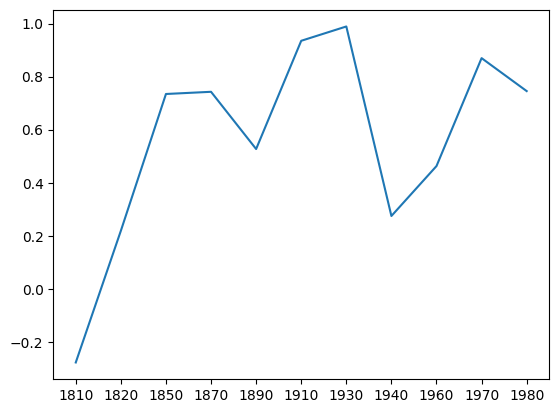

In [48]:
plt.plot(years, effect_size_result)